In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from ler import LeR
import json
import matplotlib.pyplot as plt
from gwcosmo import priors as p

%matplotlib inline

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


## For BBH

In [2]:
p.BBH_powerlaw_gaussian?

Init signature:
p.BBH_powerlaw_gaussian(
    mminbh=4.98,
    mmaxbh=112.5,
    alpha=3.78,
    mu_g=32.27,
    sigma_g=3.88,
    lambda_peak=0.03,
    delta_m=4.8,
    beta=0.81,
)
Docstring:     
Child class for BBH power law gaussian distribution.

Parameters
-------------
mminbh: Minimum mass of the PL component of the black hole mass distribution
mmaxbh: Maximum mass of the PL component of the black hole mass distribution
alpha: Spectral index for the PL of the primary mass distribution    
mu_g: Mean of the Gaussian component in the primary mass distribution
sigma_g: Width of the Gaussian component in the primary mass distribution
lambda_peak: Fraction of the model in the Gaussian component
delta_m: Range of mass tapering on the lower end of the mass distribution
beta: Spectral index for the PL of the mass ratio distribution

The default values of the parameters are set to the corresponding values reported in section 4.2 (page 23) in 2111.03604

************
NOTE: The spectral in

In [3]:
model = p.BBH_powerlaw_gaussian()
mass_1_source, mass_2_source = model.sample(10000)

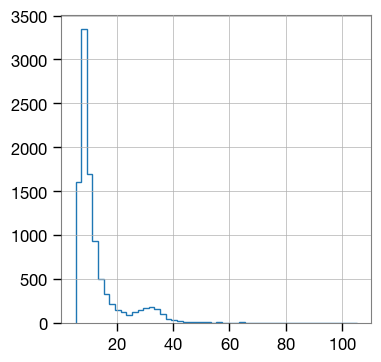

In [4]:
plt.hist(mass_1_source, bins=50, histtype='step')
plt.show()

In [2]:
param = {'alpha': 3.63, 'beta': 1.26, 'delta_m': 4.82, 'mmin': 4.59, 'mmax': 86.22, 'lambda_peak': 0.08, 'mu_g': 33.07, 'sigma_g': 5.69}
model = p.mass_prior("BBH-powerlaw-gaussian", param)
mass_1_source, mass_2_source = model.sample(Nsample=10000)

AttributeError: module 'gwcosmo.prior.priors' has no attribute 'mass_prior'

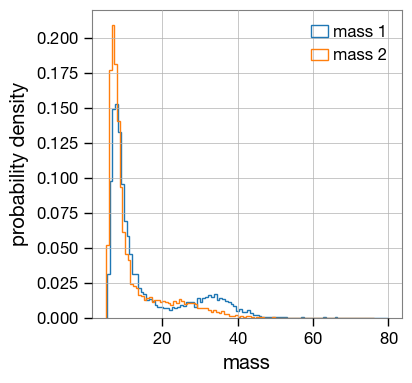

In [7]:
# plot the mass distribution
plt.figure(figsize=(4, 4))
plt.hist(mass_1_source, bins=100, histtype='step', density=True, label='mass 1')
plt.hist(mass_2_source, bins=100, histtype='step', density=True, label='mass 2')
plt.legend()
plt.xlabel('mass')
plt.ylabel('probability density')
plt.show()

## For BNS 

In [10]:
size = 10000
param = dict(mminns=1.0, mmaxns=3.0, alphans=0.0)
model = p.mass_prior("BNS", param)
mass_1_source, mass_2_source = model.sample(Nsample=size)
while np.any(mass_2_source > mass_1_source):
    mass_1_source, mass_2_source = model.sample(Nsample=size)

In [11]:
import gwcosmo as gwc

In [13]:
gwc.version()

AttributeError: module 'gwcosmo' has no attribute 'version'

In [14]:
import ler

In [15]:
ler.__version__

AttributeError: module 'ler' has no attribute '__version__'

In [16]:
np.__version__

'1.23.5'

In [3]:
# generate a simple class for testing object oriented programming
class test:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.addition = getattr(self, "add")

    def add(self):
        return self.a + self.b
    
    def my_func(self, c):
        param = getattr(self, "add")() + c
        return param

In [4]:
tt = test(1,2)

In [5]:
def test2(x = "hello world"):
    print(x)

In [10]:
ii = dict(func = test2)
tt.func = ii['func']

In [11]:
tt.func(x="test")

test


In [9]:
tt.add()

3

In [12]:
tt.my_func(2)

5

In [15]:
test = None
if test:
    print("yes")

In [1]:
from ler import CompactBinaryPopulation

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
cbc = CompactBinaryPopulation()

In [6]:
cbc.gw_param_samplers['redshift_detector_frame']

'merger_rate_density_popI_II_Oguri'

In [7]:
cbc.gw_param_samplers_params['redshift_detector_frame']

{'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}

In [ ]:
binary_masses
binary_spin
geocent_time
sky_position

try:
    self.binary_masses = getattr(self, self.gw_param_samplers['mass_source_frame'])
except:
    self.binary_masses = self.gw_param_samplers['mass_source_frame']
try:
    self.binary_spin = getattr(self, self.gw_param_samplers['spin'])
except:
    self.binary_spin = self.gw_param_samplers['spin']
try:
    self.geocent_time = getattr(self, self.gw_param_samplers['geocent_time'])
except:
    self.geocent_time = self.gw_param_samplers['geocent_time']
try:
    self.sky_position = getattr(self, self.gw_param_samplers['sky_position'])
except:
    self.sky_position = self.gw_param_samplers['sky_position']
try:
    self.phase = getattr(self, self.gw_param_samplers['phase'])
except:
    self.phase = self.gw_param_samplers['phase']
try:
    self.psi = getattr(self, self.gw_param_samplers['psi'])
except:
    self.psi = self.gw_param_samplers['psi']
try:
    self.iota = getattr(self, self.gw_param_samplers['iota'])
except:
    self.iota = self.gw_param_samplers['iota']

In [ ]:
# Sample all other parameters
        # use bilby priors
        bilby.core.utils.logger.disabled = True
        prior_default = bilby.gw.prior.BBHPriorDict()
        # draw associated angles
        ra = prior_default["ra"].sample(nsamples)
        dec = prior_default["dec"].sample(nsamples)
        psi = prior_default["psi"].sample(nsamples)
        theta_jn = prior_default["theta_jn"].sample(nsamples)
        phase = prior_default["phase"].sample(nsamples)
        # sampling spin parameters
        if self.spin_constant==0. or self.spin_constant==True:
            a_1 = np.zeros(nsamples)
            a_2 = np.zeros(nsamples)
            tilt_1 = np.zeros(nsamples)
            tilt_2 = np.zeros(nsamples)
            phi_12 = np.zeros(nsamples)
            phi_jl = np.zeros(nsamples)
        elif type(self.spin_constant)==list:
            a_1 = self.spin_constant[0]*np.ones(nsamples)
            a_2 = self.spin_constant[1]*np.ones(nsamples)
            tilt_1 = self.spin_constant[2]*np.ones(nsamples)
            tilt_2 = self.spin_constant[3]*np.ones(nsamples)
            phi_12 = self.spin_constant[4]*np.ones(nsamples)
            phi_jl = self.spin_constant[5]*np.ones(nsamples)
        else:
            a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl = self.binary_spin(nsamples)

        # compute GPS time
        geocent_time = randint.rvs(1238166018, 1238166018 + 31536000, size=nsamples)
        mass_1, mass_2 = mass_1_source * (1 + zs), mass_2_source * (1 + zs)

        super().__init__(z_min=z_min,
                        z_max=z_max,
                        event_type=event_type,
                        merger_rate_density=self.gw_param_samplers['merger_rate_density'],
                        merger_rate_density_param=self.gw_param_samplers_params['merger_rate_density'],
                        )
# for BBH
        if event_type == 'BBH':
            event_priors_ = dict(
                mass_source_frame='binary_masses_BBH_popI_II_powerlaw_gaussian',spin='constant_values_n_size', redshift_detector_frame='merger_rate_density_popI_II_Oguri', geocent_time='geocent_time_uniform', sky_position='sky_position_uniform_bilby', 
                phase='coalescence_phase_uniform_bilby', 
                psi='polarization_angle_uniform_bilby',
                iota='inclination_uniform_bilby'
                )
            event_prior_params_ = dict(
                mass_source_frame=dict(mminbh=4.98, mmaxbh=112.5, alpha=3.78, mu_g=32.27, sigma_g=3.88, lambda_peak=0.03, delta_m=4.8, beta=0.81), 
                spin=dict(value=0.), 
                redshift_detector_frame=dict(R0=23.9 * 1e-9, b2=1.6, b3=2.0, b4=30), 
                geocent_time=dict(start_time=1238166018, end_time=1238166018 + 31536000), 
                sky_position=None, 
                phase=None, 
                psi=None, 
                iota=None
                )

In [ ]:
    def binary_masses_array(self, size, mass_1_source=30.0, mass_2_source=30.0, param=None):
        """
        Function to calculate source mass1 and mass2 with pop III origin

        Parameters
        ----------
        size : `int`
            Number of samples to draw
        param : `dict`
            Dictionary of model parameters
            e.g. {'mass_1_source': 30.0, 'mass_2_source': 30.0}

        Returns
        ----------
        mass_1_source : `array`
            Array of mass1 in source frame
        mass_2_source : `array`
            Array of mass2 in source frame

        Examples
        ----------
        >>> from ler import CompactBinaryPopulation
        >>> pop = CompactBinaryPopulation(z_min=0.0001, z_max=10, m_min=4.59, m_max=86.22, event_type = "popIII")
        >>> mass_1_source, mass_2_source = pop.binary_masses_popIII(size=1000)
        """

        if param:
            mass_1_source = param['mass_1_source']
            mass_2_source = param['mass_2_source']
        # if mass_1_source is float
        if isinstance(mass_1_source, float):
            mass_1_source = np.full(size, mass_1_source)
            mass_2_source = np.full(size, mass_2_source)
        # if mass_1_source is array or list
        elif isinstance(mass_1_source, (list, np.ndarray)):
            mass_1_source = np.array(mass_1_source)
            mass_2_source = np.array(mass_2_source)
            # check if the length of the array is equal to size
            if len(mass_1_source) != size:
                raise ValueError(
                    f"mass_1_source and mass_2_source should be of length {size}"
                )

        return (mass_1_source, mass_2_source)